# Data Wrangling and Analyzing

## Introduction

Gathering data from a variety of sources and in a variety of formats, assessing its quality and tidiness, then cleaning it, this is called data wrangling.
The dataset that be will be used for wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.
The purpose of this project is to  wrangle WeRateDogs Twitter data to create interesting analyses and visualizations.

## Gathering Data

In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
%matplotlib inline
import requests
import tweepy
import os
import time
import json
import re

In [319]:
# load the twitter-archive-enhanced.csv into a DataFrame
twitter_archive_data = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive_data.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [320]:
# downloading image from udacity server 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response_data = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(response_data.content)

In [321]:
# load the data of image prediction
prediction_data = pd.read_csv('image-predictions.tsv', sep='\t')
prediction_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
twitter_archive_data = twitter_archive_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
    

In [323]:
temp_dataframe = []

with open('tweet-json.txt') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        favorite_count = json_data['favorite_count']
        retweet_count = json_data['retweet_count']      
        temp_dataframe.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_count': retweet_count})

# create a new DataFrame 
df = pd.DataFrame(temp_dataframe, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
df.head()

df.to_csv('tweet_json.txt', index=False)

## Exploring Dataset 

#### Exploring twitter_archive dataset

In [324]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [325]:
twitter_archive_data.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [326]:
list(twitter_archive_data.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [327]:
twitter_archive_data.isnull().sum(axis=0)

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [328]:
twitter_archive_data['tweet_id'].duplicated().sum()

0

In [329]:
twitter_archive_data.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [330]:
twitter_archive_data['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Trip          1
Sunshine      1
Bones         1
Dook          1
Hanz          1
Name: name, Length: 957, dtype: int64

In [331]:
# the lowercase names in the 'name' column seem to be wrong, let's look at them
twitter_archive_data.loc[(twitter_archive_data['name'].str.islower())].head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None


In [332]:
temp= pd.DataFrame(twitter_archive_data['doggo'] +twitter_archive_data['floofer'] +twitter_archive_data['pupper'] +twitter_archive_data['puppo'],columns=["stageTemp" ])
temp

,stageTemp
0,NoneNoneNoneNone
1,NoneNoneNoneNone
2,NoneNoneNoneNone
3,NoneNoneNoneNone
4,NoneNoneNoneNone
...,...
2351,NoneNoneNoneNone
2352,NoneNoneNoneNone
2353,NoneNoneNoneNone
2354,NoneNoneNoneNone


In [333]:
def stageFinder(row):
    if("doggo" in row.stageTemp):
        return "doggo"
    elif("floofer" in row.stageTemp):
        return "floofer"
    elif("puppo" in row.stageTemp):
        return "puppo"
    elif("pupper" in row.stageTemp):
        return "pupper"
    else:
        return "None"
    
twitter_archive_data['stage']=temp.apply(stageFinder,axis=1)

In [334]:
#Checking the stage column for number of none values
twitter_archive_data.loc[twitter_archive_data['stage']=="None"].shape[0] 
#this stage column is used only to find the number of rows with None value

1976

1976 dog stage value is none.

In [335]:
twitter_archive_data.loc[(twitter_archive_data['doggo']== 'doggo') & (twitter_archive_data['pupper']== 'pupper')].shape[0]
# 12 rows contains 2 dogs of stage doggo and pupper

12

In [336]:
twitter_archive_data.loc[(twitter_archive_data['doggo']== 'doggo') & (twitter_archive_data['puppo']== 'puppo')].shape[0]

1

In [337]:
twitter_archive_data.loc[(twitter_archive_data['floofer']== 'floofer') & (twitter_archive_data['pupper']== 'pupper')].shape[0]

0

In [392]:
twitter_archive_data.loc[(twitter_archive_data['floofer']== 'floofer') & (twitter_archive_data['puppo']== 'puppo')].shape[0]

0

In [394]:
twitter_archive_data.loc[(twitter_archive_data['pupper']== 'pupper') & (twitter_archive_data['puppo']== 'puppo')].shape[0]

0

In [395]:
# take a further look on the text column
twitter_archive_data['tempHolder']=temp.stageTemp
count=twitter_archive_data.loc[( twitter_archive_data['tempHolder'].str.contains("NoneNoneNoneNone") ) | (twitter_archive_data['tempHolder'].str.contains("NoneNoneNone"))].shape[0]
print((twitter_archive_data.shape[0] - count), "rows contains more than one stage ")

268 rows contains more than one stage 


.

In [396]:
# Are there any ratings using decimal numbers?
twitter_archive_data[twitter_archive_data['text'].str.contains(r'(\d+\.\d+\/\d+)')]

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,tempHolder
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,None,NoneNoneNoneNone
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,None,NoneNoneNoneNone
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,None,NoneNoneNoneNone
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,pupper,NoneNonepupperNone
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None,None,NoneNoneNoneNone
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,None,NoneNoneNoneNone


Some ratings contain decimal numbers which lead to wrong numerator and denominator ratings.

In [397]:
twitter_archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [398]:
np.sort(twitter_archive_data['rating_numerator'].unique()) , np.sort(twitter_archive_data['rating_denominator'].unique())

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
          45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
         165,  182,  204,  420,  666,  960, 1776], dtype=int64),
 array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
        110, 120, 130, 150, 170], dtype=int64))

In [399]:
twitter_archive_data['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [400]:
twitter_archive_data['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [401]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#####  Quality issue in twitter_archive_data dataframe 
1. Timestamp is not of datetime format
2. 1976 rows has none in their stage 
3. Name column contain some invalid name
4. Name column contain a total of 745 of name as none
5. in data tweet_id datatype should be String instead of Int
6. tweet rating contains values as in decimal and also some tweets contain more than 2 rating because it is rating two dogs in that column.
7.  More than two dogs are rated in one tweet which can bring inconsistency in that data.
8. Contain columns which are not needed such as in_reply_to_status_id , in_reply_to_user_id   

#### Exploring predictions Dataset

In [402]:
prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [403]:
prediction_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [404]:
prediction_data.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [405]:
prediction_data.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1706,817536400337801217,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2,pug,0.971358,True,French_bulldog,0.028518,True,Boston_bull,0.000086,True
1937,860276583193509888,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,1,lakeside,0.312299,False,dock,0.159842,False,canoe,0.070795,False
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
735,687096057537363968,https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg,1,Labrador_retriever,0.417107,True,Chesapeake_Bay_retriever,0.341730,True,German_short-haired_pointer,0.177702,True
1062,715220193576927233,https://pbs.twimg.com/media/Cez49UqWsAIRQXc.jpg,1,Chihuahua,0.584026,True,Italian_greyhound,0.377077,True,Boston_bull,0.017400,True


In [406]:
prediction_data.isnull().sum(axis=0)

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [407]:
prediction_data['tweet_id'].duplicated().sum(0)

0

In [408]:
len(set(list(prediction_data['p1'].unique())+(list(prediction_data.p2.unique())))) # total 535 different dog breed age given 
#but if one look at the data they can see that it also contains some values which does not signify dog breed

535

In [409]:
print("unique Values in img_num Column\n",prediction_data['img_num'].unique() ),print("\n"), print("Count of unique Values in img_num Column\n",prediction_data['img_num'].value_counts())

unique Values in img_num Column
 [1 4 2 3]


Count of unique Values in img_num Column
 1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64


(None, None, None)

In [410]:
print("unique Values in img_num Column\n",prediction_data['p1_dog'].unique() ),print("\n"), print("Count of unique Values in p1_dog Column\n",prediction_data['p1_dog'].value_counts())

unique Values in img_num Column
 [ True False]


Count of unique Values in p1_dog Column
 True     1532
False     543
Name: p1_dog, dtype: int64


(None, None, None)

In [411]:
print("unique Values in p2_dog Column\n",prediction_data['p2_dog'].unique() ),print("\n"), print("Count of unique Values in p2_dog Column\n",prediction_data['p2_dog'].value_counts())

unique Values in p2_dog Column
 [ True False]


Count of unique Values in p2_dog Column
 True     1553
False     522
Name: p2_dog, dtype: int64


(None, None, None)

In [412]:
print("unique Values in p3_dog Column\n",prediction_data['p3_dog'].unique() ),print("\n"), print("Count of unique Values in p3_dog Column\n",prediction_data['p3_dog'].value_counts())

unique Values in p3_dog Column
 [ True False]


Count of unique Values in p3_dog Column
 True     1499
False     576
Name: p3_dog, dtype: int64


(None, None, None)

#### Quality Issue in prediction_data Dataframe
1. In columns p1,p2,p3 dog breeds are not valid everywhere, contains some invalid dog breed such as window etc.
2. Data in img_num is not of much use because not much information can be inferred

#### Dataset 3 - additional_tweet DataFrame

In [413]:
additional_tweet = pd.read_csv('tweet_json.txt')
additional_tweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [414]:
additional_tweet.sample(5)

,tweet_id,favorite_count,retweet_count
574,801115127852503040,8992,2429
1278,708834316713893888,1860,571
895,759047813560868866,7227,2302
1990,672614745925664768,1302,644
296,837110210464448512,17480,2731


In [415]:
additional_tweet['tweet_id'].duplicated().sum(axis=0)

0

In [416]:
additional_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [417]:
additional_tweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


#### Quality issue in  additional_tweet Dataframe
1. tweet_id can be of string type


#### Tidness Issues in DataFrame
1. In twitter_archive_data, it has 4 columns namely dogger, floofer, pupper, puppo which all signify dog stage only
2. Column of Dataframe such as additional_tweet , prediction_data and twitter_archive_data can be joined

## Cleaning Data

#### create DataFrame copies 

In [418]:
twitter_archive_data_temp = twitter_archive_data.copy()
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [419]:
predictions_data_temp = prediction_data.copy()

In [420]:
additional_tweet_temp = additional_tweet.copy()

#### 1. Cleaning of columns value

In [421]:
twitter_archive_data_temp['source']=twitter_archive_data_temp["source"].apply(lambda x: re.findall(r'>(.*)<', x)[0])
twitter_archive_data_temp["source"].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [422]:
twitter_archive_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [423]:
#Here we will be deleting the retweets
twitter_archive_data_temp = twitter_archive_data_temp[pd.isnull(twitter_archive_data_temp.retweeted_status_id)]

# Sropping the columns that are not needed
twitter_archive_data_temp = twitter_archive_data_temp.drop('retweeted_status_id', 1)
twitter_archive_data_temp = twitter_archive_data_temp.drop('retweeted_status_user_id', 1)



In [424]:
prediction = []
confidence = []

def prec_conf_mapper(mapper):
    if mapper['p1_dog'] == True:
        prediction.append(predictions_data_temp['p1'])
        confidence.append(predictions_data_temp['p1_conf'])
    elif mapper['p2_dog'] == True:
        prediction.append(predictions_data_temp['p2'])
        confidence.append(predictions_data_temp['p2_conf'])
    elif mapper['p3_dog'] == True:
        prediction.append(predictions_data_temp['p3'])
        confidence.append(predictions_data_temp['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

predictions_data_temp.apply(prec_conf_mapper, axis=1)
predictions_data_temp['prediction'] = prediction
predictions_data_temp['confidence'] = confidence

In [425]:
#Dropping columns which are not required in predictions_data_temp
predictions_data_temp = predictions_data_temp.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [426]:
predictions_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    2075 non-null   int64 
 1   jpg_url     2075 non-null   object
 2   prediction  2075 non-null   object
 3   confidence  2075 non-null   object
dtypes: int64(1), object(3)
memory usage: 65.0+ KB


#### cleaning rating data in dataframe

In [427]:
multiple_rating = twitter_archive_data_temp['tweet_id'][twitter_archive_data_temp.text.str.contains
                                              ( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].tolist()
multiple_rating

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



[881633300179243008,
 835246439529840640,
 777684233540206592,
 747600769478692864,
 740373189193256964,
 722974582966214656,
 716439118184652801,
 714258258790387713,
 703356393781329922,
 695064344191721472,
 694352839993344000,
 691483041324204033,
 690400367696297985,
 689835978131935233,
 682962037429899265,
 677314812125323265,
 676191832485810177,
 674737130913071104,
 674646392044941312,
 673295268553605120,
 672248013293752320,
 671154572044468225,
 670434127938719744,
 669037058363662336,
 668537837512433665,
 667544320556335104,
 667491009379606528,
 667070482143944705,
 666835007768551424,
 666287406224695296]

In [428]:
# 
twitter_archive_data_temp['final_numerator_rating'] = twitter_archive_data_temp['rating_numerator']

# replace false rating_numerator values with NaN for all tweets with double ratings and converting to numeric
twitter_archive_data_temp['final_numerator_rating'] = pd.to_numeric(np.where(twitter_archive_data_temp['tweet_id'].isin(multiple_rating),
                                                         np.NaN, twitter_archive_data_temp['final_numerator_rating']))

# there should be 30 NaN values
twitter_archive_data_temp['final_numerator_rating'].isnull().sum()

30

In [429]:
twitter_archive_data_temp['final_numerator_rating'].dtype

dtype('float64')

In [430]:
# tweet containing decimal values should be corrected too
twitter_archive_data_temp[twitter_archive_data_temp.text.str.contains( r'(\d+\.\d+)/(\d+)')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,tempHolder,final_numerator_rating
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,None,NoneNoneNoneNone,5.0
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,None,NoneNoneNoneNone,75.0
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,pupper,NoneNonepupperNone,27.0
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,NaN,5,10,None,None,None,None,None,None,NoneNoneNoneNone,5.0
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,None,NoneNoneNoneNone,26.0


In [431]:
mapper_dict = dict(zip(twitter_archive_data_temp['tweet_id'][twitter_archive_data_temp.text.str.contains( r'(\d+\.\d+)/(\d+)')].tolist() , twitter_archive_data_temp['text'].str.extract( r'(\d+\.\d+)/(\d+)')[0].dropna().tolist()))
mapper_dict

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



{883482846933004288: '13.5',
 786709082849828864: '9.75',
 778027034220126208: '11.27',
 681340665377193984: '9.5',
 680494726643068929: '11.26'}

In [432]:
# created a dictionary to map the wrong rating with correct one
twitter_archive_data_temp.loc[twitter_archive_data_temp['tweet_id'].isin(mapper_dict.keys()), 'rating_numerator_new'] = twitter_archive_data_temp['tweet_id'].map(mapper_dict)

#### Merging the dataframe together 
##### Merging the dataframe using how='inner'

In [450]:
# merge twitter_archive_clean with predictions_clean
merged_df = pd.merge(twitter_archive_data_temp, predictions_data_temp, how = 'inner', on = ['tweet_id'])

# merge complete_df with twitter_add_info_clean
merged_df = pd.merge(merged_df, additional_tweet_temp, how = 'inner', on = ['tweet_id'])


In [451]:
merged_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,puppo,stage,tempHolder,final_numerator_rating,rating_numerator_new,jpg_url,prediction,confidence,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,...,None,None,NoneNoneNoneNone,13.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,...,None,None,NoneNoneNoneNone,13.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,0 Welsh_springer_spaniel 1 ...,0 0.465074 1 0.506826 2 0.59...,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,...,None,None,NoneNoneNoneNone,12.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,0 Welsh_springer_spaniel 1 ...,0 0.465074 1 0.506826 2 0.59...,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,...,None,None,NoneNoneNoneNone,13.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,0 collie 1 miniature_p...,0 0.156665 1 0.074192 2 0.13...,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,...,None,None,NoneNoneNoneNone,12.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,0 Welsh_springer_spaniel 1 ...,0 0.465074 1 0.506826 2 0.59...,41048,9774


#### formatting the timestamp column

In [452]:
#chaging the data type
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

In [453]:
merged_df.timestamp.dtypes #checking the dtype

datetime64[ns, UTC]

#### Changing tweet_id type

In [454]:
merged_df['tweet_id'] = merged_df['tweet_id'].astype('str')

In [455]:
merged_df['tweet_id'].dtype
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_timestamp  0 non-null      object             
 7   expanded_urls               1994 non-null   object             
 8   rating_numerator            1994 non-null   int64              
 9   rating_denominator          1994 non-null   int64              
 10  name                        1994 non-null   object          

In [456]:
#Dropping columns which aren't required
columns = ['in_reply_to_status_id','tempHolder','in_reply_to_user_id', 'retweeted_status_timestamp','expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator' ]
merged_df.drop(columns,axis=1,inplace=True)

In [457]:
merged_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_denominator', 'name',
       'stage', 'final_numerator_rating', 'rating_numerator_new', 'jpg_url',
       'prediction', 'confidence', 'favorite_count', 'retweet_count'],
      dtype='object')

#### Exporting csv as twitter_archive_master.csv as required

In [458]:

merged_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Now cleaning has been done, so next step is visualization

# Data Visualization

In [459]:
plt.rcParams['figure.figsize'] = (16,12)

In [460]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                1994 non-null   int64  
 1   timestamp               1994 non-null   object 
 2   source                  1994 non-null   object 
 3   text                    1994 non-null   object 
 4   rating_denominator      1994 non-null   int64  
 5   name                    1994 non-null   object 
 6   stage                   1994 non-null   object 
 7   final_numerator_rating  1967 non-null   float64
 8   rating_numerator_new    4 non-null      float64
 9   jpg_url                 1994 non-null   object 
 10  prediction              1686 non-null   object 
 11  confidence              1994 non-null   object 
 12  favorite_count          1994 non-null   int64  
 13  retweet_count           1994 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memor

In [461]:
# Changing Data types to appropriate 
df['source'] = df['source'].astype('category')
df['tweet_id'] = df['tweet_id'].astype('str')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1994 non-null   object             
 1   timestamp               1994 non-null   datetime64[ns, UTC]
 2   source                  1994 non-null   category           
 3   text                    1994 non-null   object             
 4   rating_denominator      1994 non-null   int64              
 5   name                    1994 non-null   object             
 6   stage                   1994 non-null   object             
 7   final_numerator_rating  1967 non-null   float64            
 8   rating_numerator_new    4 non-null      float64            
 9   jpg_url                 1994 non-null   object             
 10  prediction              1686 non-null   object             
 11  confidence              1994 non-null   obj

#### finding tweet by months

Text(0, 0.5, 'Count of Tweets')

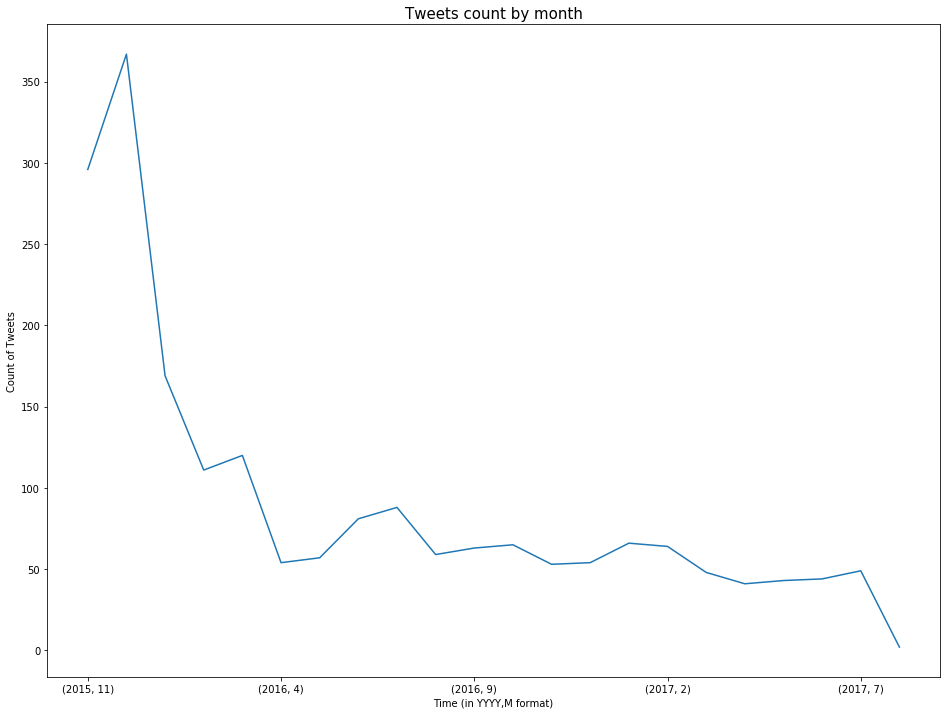

In [484]:
temp_data = df['tweet_id'].groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).count()
temp_data.plot(kind='line')
plt.title('Tweets count by month', size=15)
plt.xlabel('Time (in YYYY,M format)')
plt.ylabel('Count of Tweets')

We can see that in November, 2015 highest number of tweets were posted and the lowest being during july, 2017 and the graph is decreasing continously

Both distribution follow a normal distribution.

#### Visualization of twitter resource, platform wise

In [487]:
count=list(df.groupby('source')['tweet_id'].count())
label=df.groupby('source')['tweet_id'].count()
label=list(label.index)

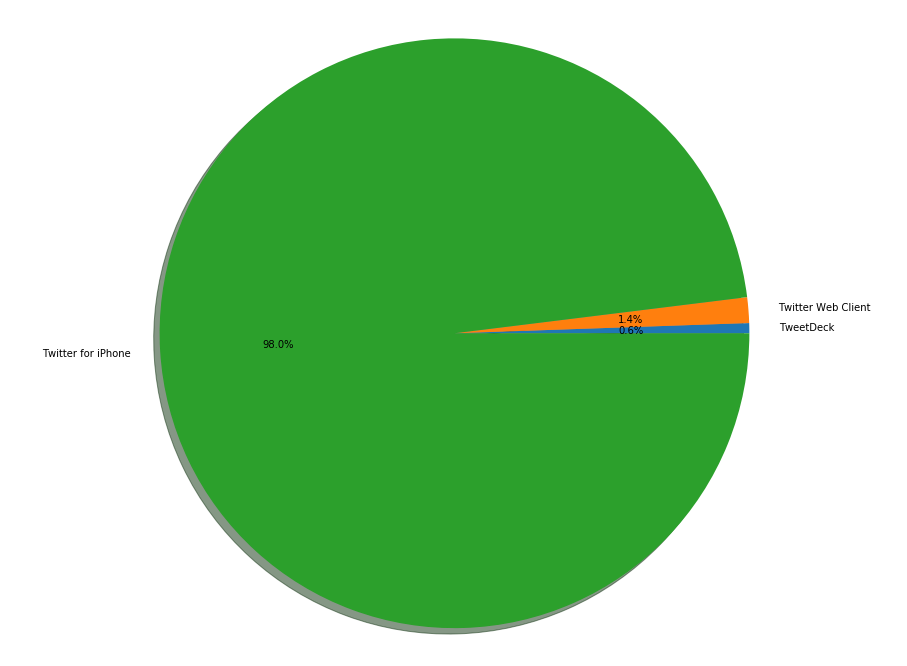

In [489]:
fig1, ax1 = plt.subplots()
ax1.pie(count,labels=label,autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

##### It can be seen that twitter for iphone is used mostly followed by Twitter web client then TweetDeck

#### What are the 10 most frequent dog names?

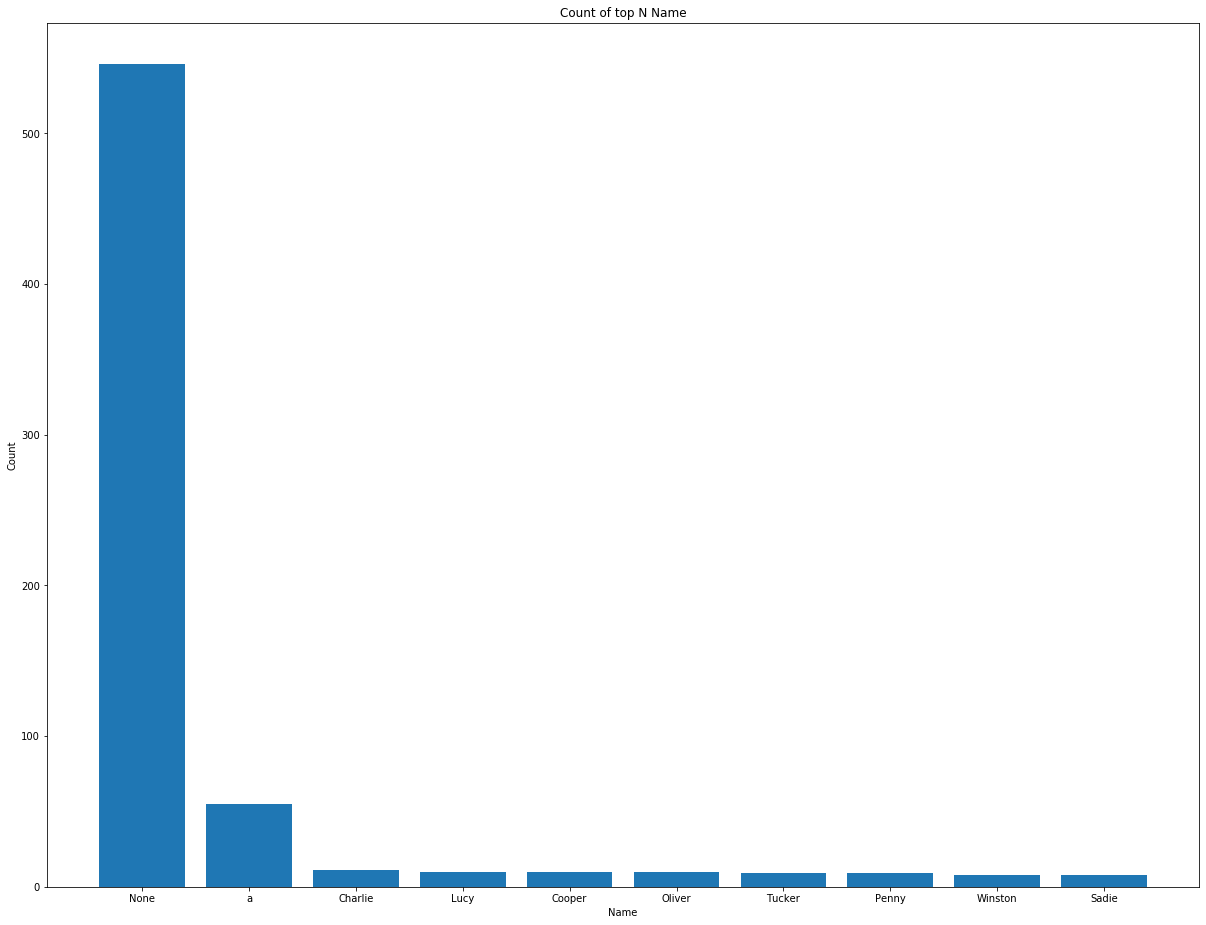

In [511]:
count=list(df['name'].value_counts()[0:10].sort_values(ascending=False))
label=list(df['name'].value_counts()[0:10].sort_values(ascending=False).index)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,count)
plt.xlabel("Name")
plt.ylabel("Count")
ax.set_title("Count of top N Name")
plt.show()


##### TimeTrend for retweet and favourite

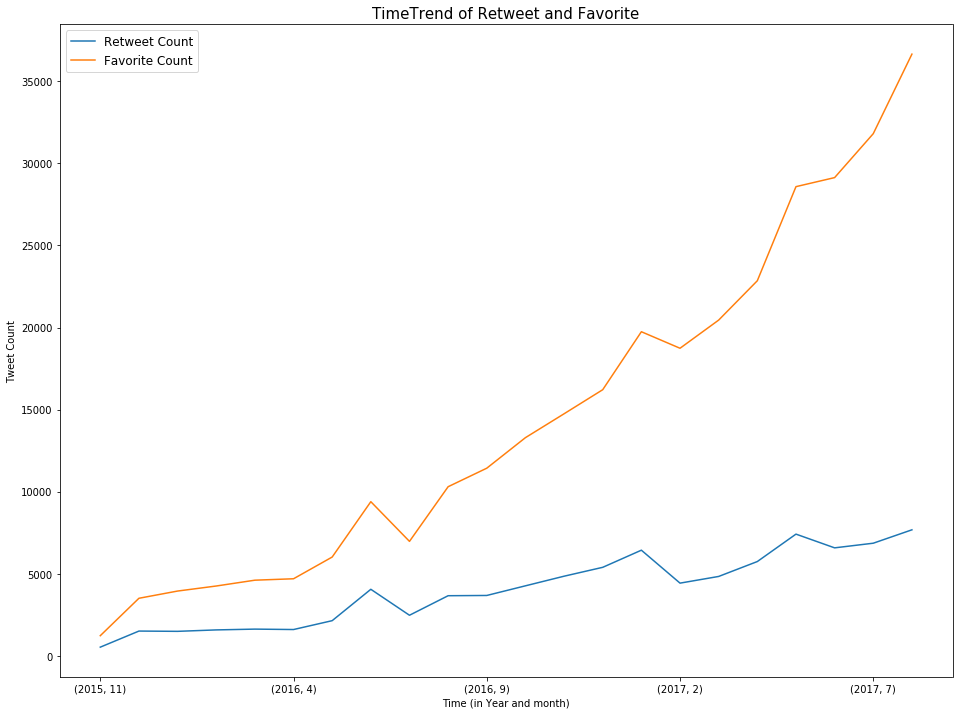

In [482]:
df.retweet_count.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).mean().plot(kind='line')
df.favorite_count.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).mean().plot(kind='line')
plt.title('TimeTrend of Retweet and Favorite', size =15)
plt.ylabel('Tweet Count')
plt.xlabel('Time (in Year and month)')
plt.legend(('Retweet Count', 'Favorite Count'), fontsize=12)

We can see that the favorite count has increased a lot whereas retweet count has increase very slightly over the time

#### Finding count of dog stage

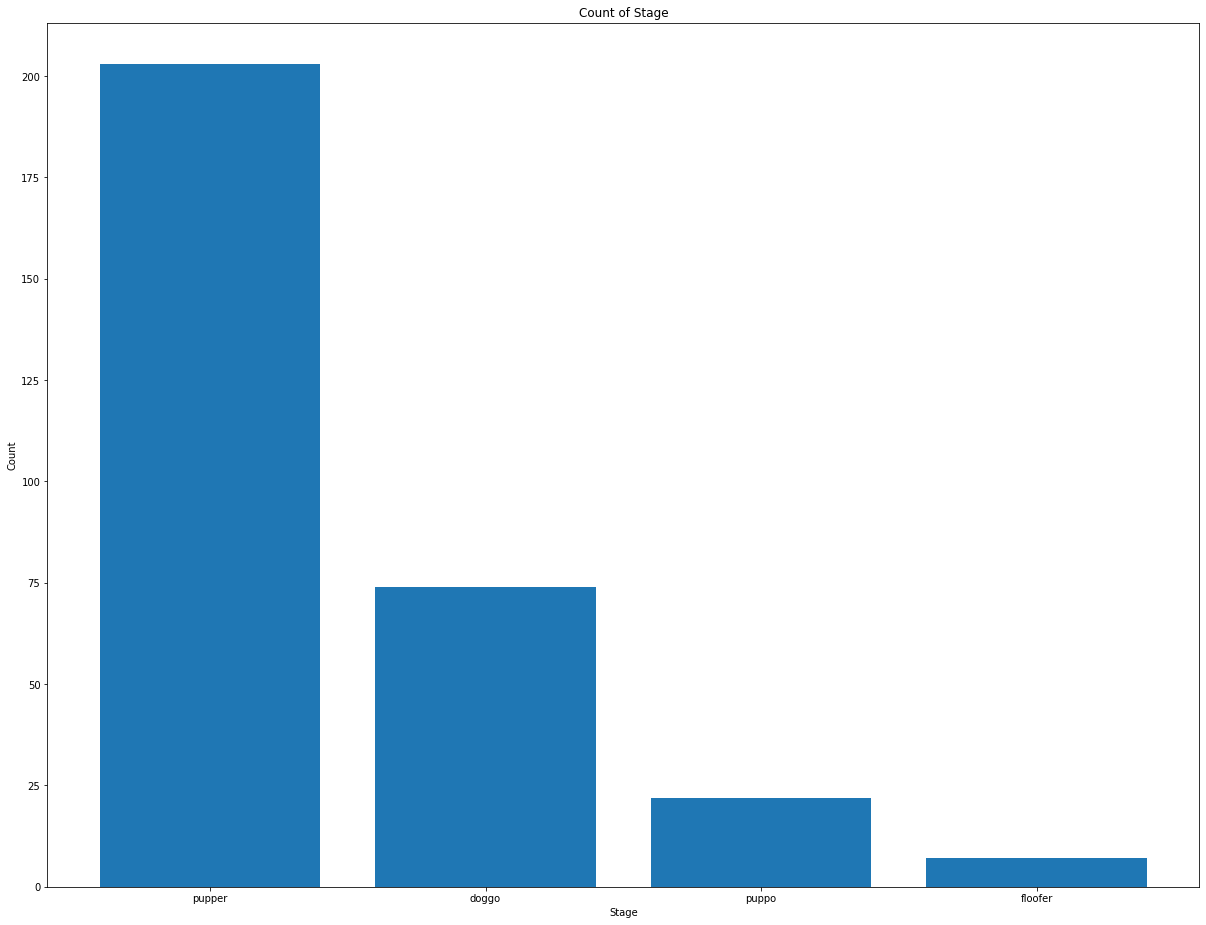

In [513]:
count=list(df['stage'].value_counts().sort_values(ascending=False)[1:])
label=list(df['stage'].value_counts().sort_values(ascending=False)[1:].index)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,count)
plt.xlabel("Stage")
plt.ylabel("Count")
ax.set_title("Count of Stage")
plt.show()
